# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
print(df["flight_day"].unique())
print(df["sales_channel"].unique())
print(df["trip_type"].unique())
print(df["num_passengers"].unique())
print(df["booking_origin"].unique())

[6 3 4 1 7 2 5]
['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']
[2 1 3 4 6 5 7 9 8]
['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'Réunion' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland' 'Nicaragua

In [9]:
df.duplicated().sum()

719

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,3.813620,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,1.991913,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:
df.corr(method='pearson')

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.214999,-0.115380,0.016393,0.014801,0.120724,0.029509,0.022252,-0.062028,0.024092
purchase_lead,0.214999,1.000000,-0.076747,0.035112,0.036214,-0.021599,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.076747,1.000000,-0.025525,0.000756,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.035112,-0.025525,1.000000,0.024212,-0.010911,0.012251,0.011953,-0.003236,0.006705
flight_day,0.014801,0.036214,0.000756,0.024212,1.000000,-0.002517,0.005723,0.007799,0.019187,-0.007061
wants_extra_baggage,0.120724,-0.021599,0.177536,-0.010911,-0.002517,1.000000,0.208392,0.216835,0.057637,0.068452
wants_preferred_seat,0.029509,-0.004459,0.031215,0.012251,0.005723,0.208392,1.000000,0.315162,0.100652,0.050189
wants_in_flight_meals,0.022252,-0.022533,0.098846,0.011953,0.007799,0.216835,0.315162,1.000000,0.156233,0.026399
flight_duration,-0.062028,0.067934,0.140408,-0.003236,0.019187,0.057637,0.100652,0.156233,1.000000,-0.106529
booking_complete,0.024092,-0.022132,-0.042080,0.006705,-0.007061,0.068452,0.050189,0.026399,-0.106529,1.000000


In [14]:
df['route'].value_counts()

AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

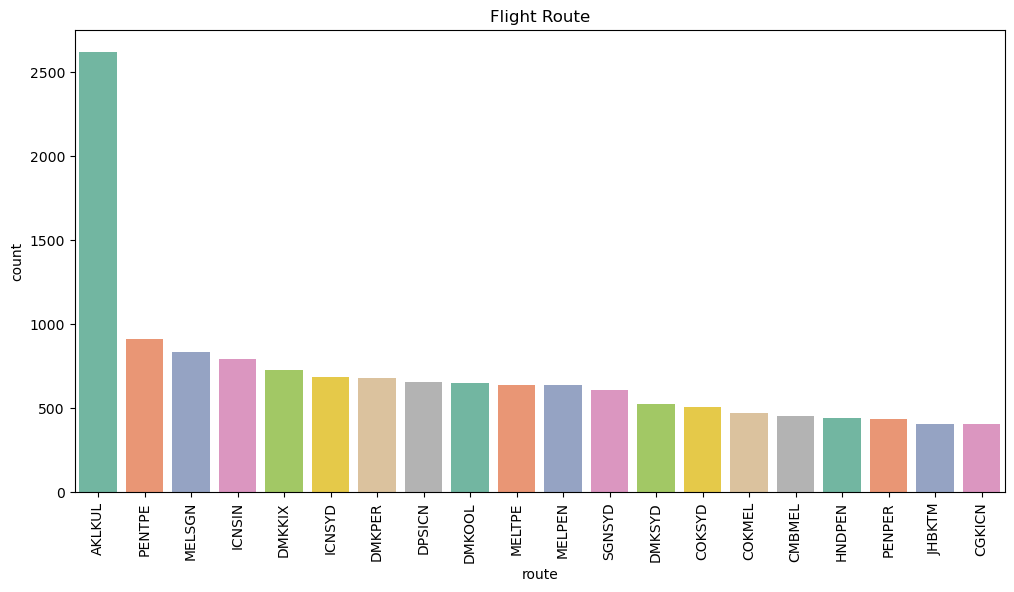

In [15]:
plt.figure(figsize=(12,6))
plt.title('Flight Route')
plt.xticks(rotation=90)
sns.countplot(x=df['route'].sort_index(), 
              data=df, 
              palette='Set2', 
              order=df.route.value_counts().iloc[:20].index,
              );

In [16]:
df['booking_origin'].value_counts().iloc[:20]

Australia         17691
Malaysia           7055
South Korea        4502
Japan              3819
China              3284
Indonesia          2317
Taiwan             2042
Thailand           1993
India              1258
New Zealand        1060
Singapore          1034
United States       453
Vietnam             386
Macau               301
Hong Kong           294
Philippines         265
United Kingdom      173
Brunei              161
Cambodia            131
(not set)            78
Name: booking_origin, dtype: int64

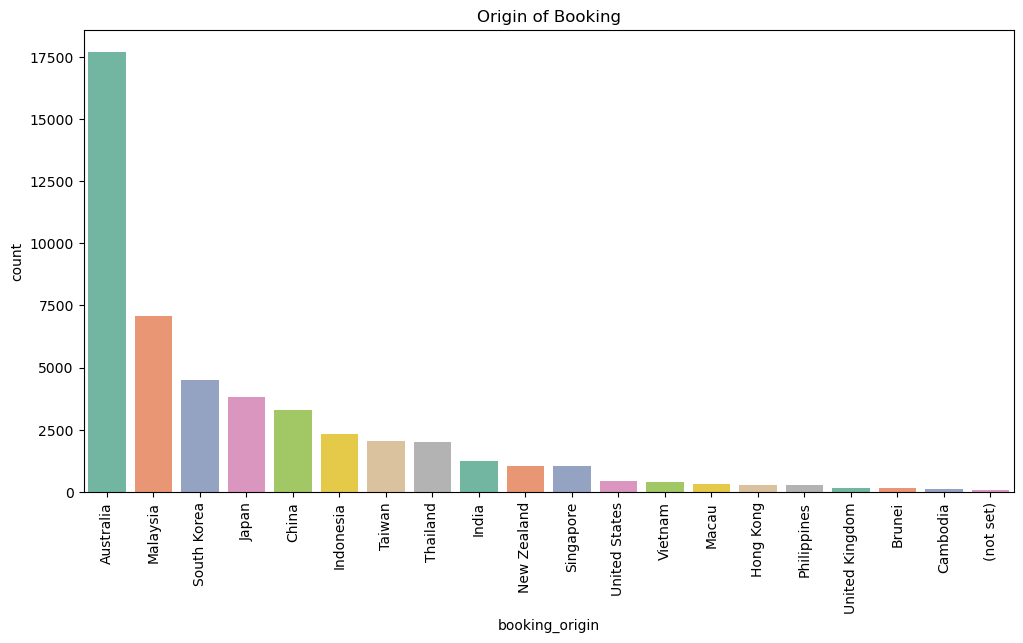

In [17]:
plt.figure(figsize=(12,6))
plt.title('Origin of Booking')
plt.xticks(rotation=90)
sns.countplot(x=df['booking_origin'].sort_index(), 
              data=df, 
              palette='Set2', 
              order=df.booking_origin.value_counts().iloc[:20].index,
              );

In [18]:
df['sales_channel'].value_counts(normalize=True)

Internet    0.891155
Mobile      0.108845
Name: sales_channel, dtype: float64

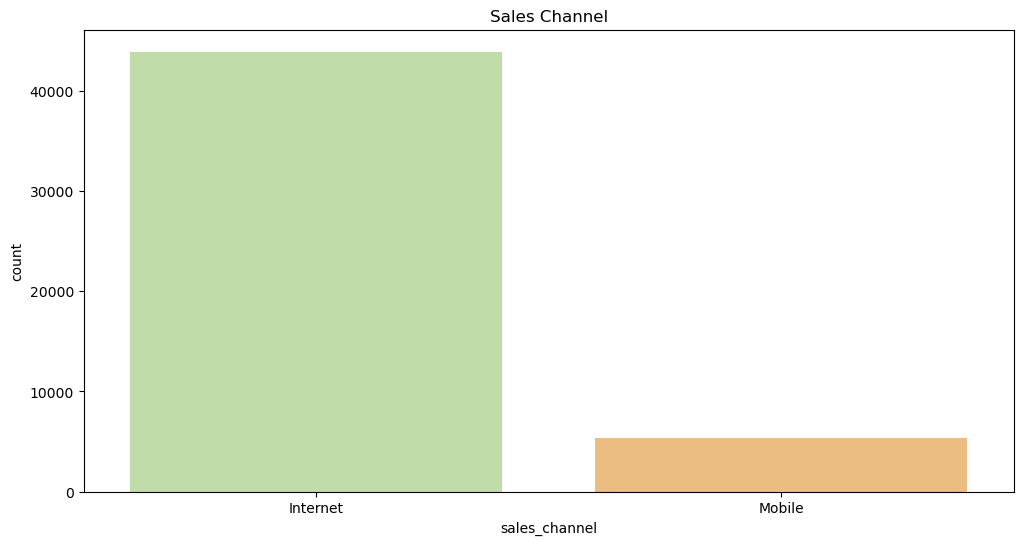

In [19]:
#sales_channel

plt.figure(figsize=(12,6))
plt.title("Sales Channel")
sns.countplot(x=df['sales_channel'], data=df, palette='Spectral_r');

In [20]:
df['trip_type'].value_counts(normalize=True)

RoundTrip     0.989814
OneWay        0.007833
CircleTrip    0.002354
Name: trip_type, dtype: float64

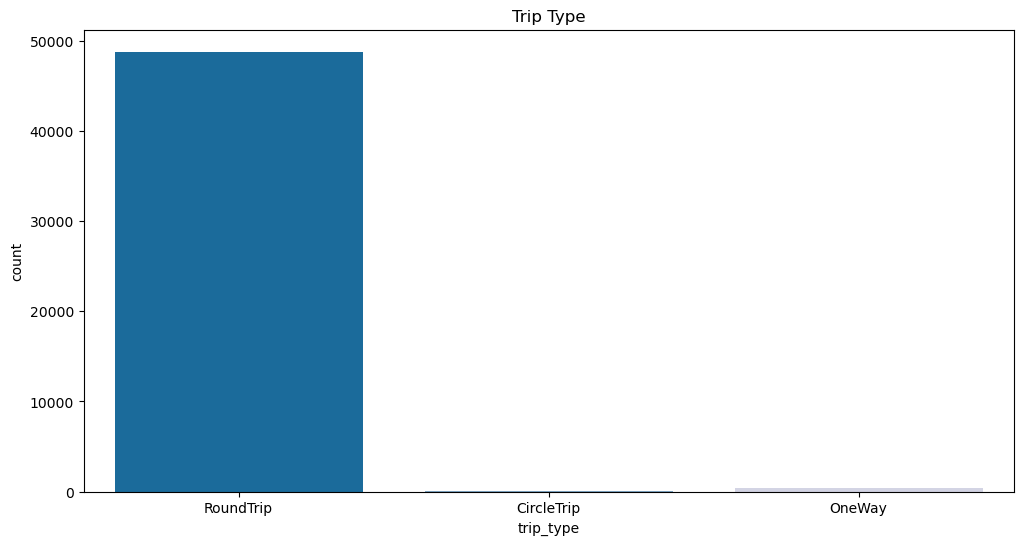

In [21]:
# Trip Type PuBu_r
plt.figure(figsize=(12,6))
plt.title("Trip Type")
sns.countplot(x=df['trip_type'], data=df, palette='PuBu_r');

In [22]:
df['num_passengers'].value_counts(normalize=True)

1    0.626590
2    0.257077
3    0.058481
4    0.035856
5    0.011039
6    0.005702
7    0.002171
8    0.001786
9    0.001299
Name: num_passengers, dtype: float64

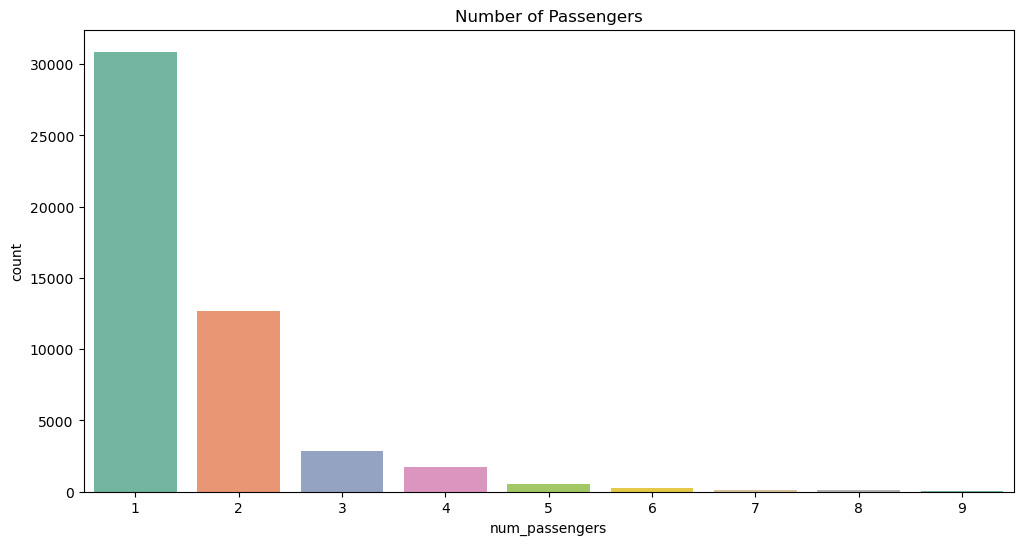

In [23]:
# num_passengers
plt.figure(figsize=(12,6))
plt.title('Number of Passengers')
sns.countplot(x=df['num_passengers'], data=df, palette='Set2');

In [24]:
df['wants_extra_baggage'].value_counts(normalize=True)

1    0.668229
0    0.331771
Name: wants_extra_baggage, dtype: float64

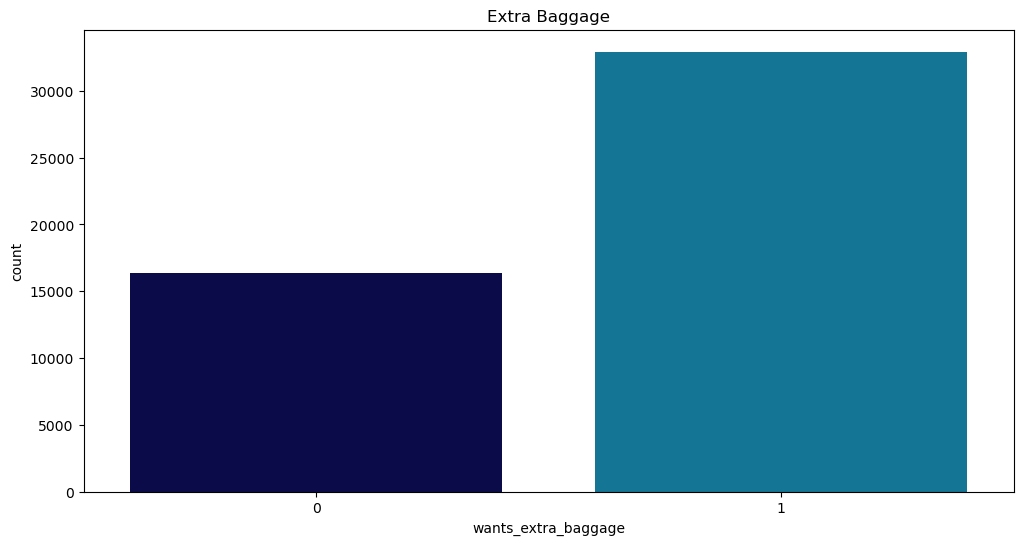

In [25]:
#wants_extra_baggage
plt.figure(figsize=(12,6))
plt.title('Extra Baggage')
sns.countplot(x=df['wants_extra_baggage'], data=df, palette='ocean');

In [26]:
df['wants_preferred_seat'].value_counts(normalize=True)


0    0.704369
1    0.295631
Name: wants_preferred_seat, dtype: float64

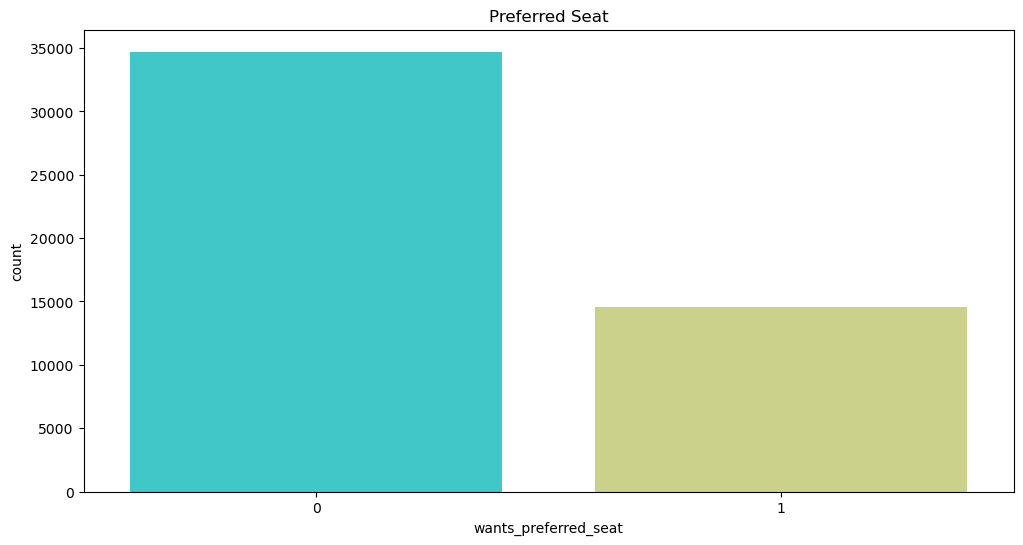

In [27]:
#wants_preferred_seat
plt.figure(figsize=(12,6))
plt.title('Preferred Seat')
sns.countplot(x=df['wants_preferred_seat'], data=df, palette='rainbow');

In [28]:
df['wants_in_flight_meals'].value_counts(normalize=True)


0    0.573365
1    0.426635
Name: wants_in_flight_meals, dtype: float64

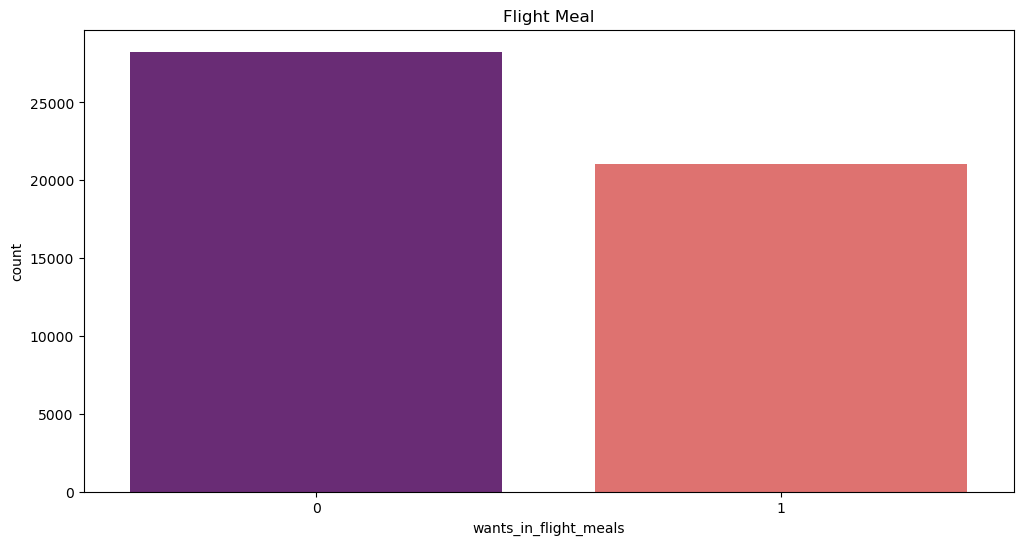

In [29]:
plt.figure(figsize=(12,6))
plt.title('Flight Meal')
sns.countplot(x=df['wants_in_flight_meals'], data=df, palette='magma');

In [30]:
df['booking_complete'].value_counts(normalize=True)


0    0.850023
1    0.149977
Name: booking_complete, dtype: float64

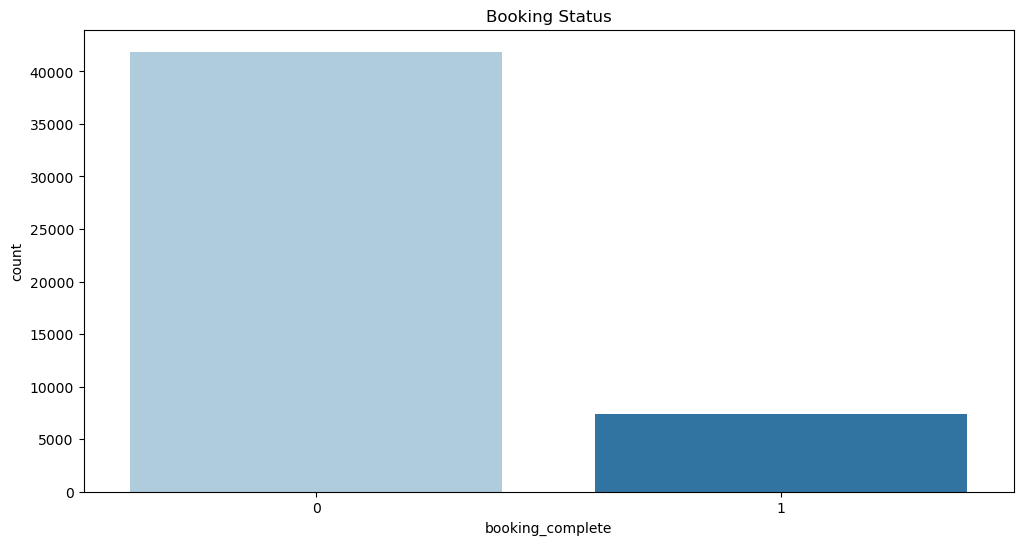

In [31]:
plt.figure(figsize=(12,6))
plt.title('Booking Status')
sns.countplot(x=df['booking_complete'], data=df, palette='Paired');

## Insights

1. The highest number of bookings is from Australia Origin.
2. Around 90% of bookings were done on the internet.
3. Around 67% of passengers wanted extra baggage in the booking.
4. Around 70% of customers do not want their preferred seat.
5. Around 57% of customers do not prefer meals.
6. Around 99% of passengers take Round Trips.
7. Around 62% of passengers are single travelers.
8. Around 85% of customers do not complete their booking.

In [32]:
X = df.drop('booking_complete', axis=1)
y = df.booking_complete

In [34]:
for col_name in X.select_dtypes("object"):
    X[col_name], _ = X[col_name].factorize()

In [35]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [36]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores 

route                    0.053666
booking_origin           0.049823
flight_duration          0.019019
length_of_stay           0.010450
wants_extra_baggage      0.005598
num_passengers           0.003033
wants_in_flight_meals    0.001474
flight_hour              0.001364
wants_preferred_seat     0.000891
sales_channel            0.000214
trip_type                0.000000
purchase_lead            0.000000
flight_day               0.000000
Name: MI Scores, dtype: float64

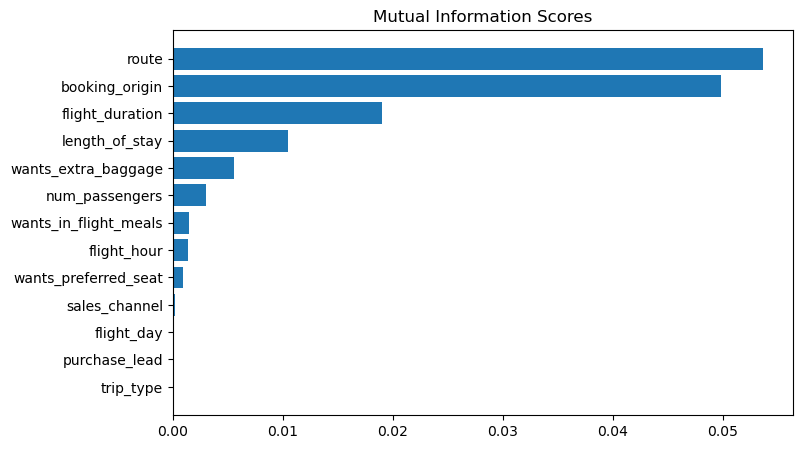

In [37]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(figsize=(8, 5))
plot_mi_scores(mi_scores)

In [38]:
from sklearn.preprocessing import MinMaxScaler

def scaler(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

## Training & Testing the data

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Model 1 : Random forest classifier with top 6 features

In [41]:
features = ['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X = df[features]

# one-hot-encoding
X = pd.get_dummies(X, columns=features)
X = scaler(X)
y = df.booking_complete

model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_val)

In [42]:
print('Accuracy Score :', accuracy_score(y_val, preds)*100)
print('AUC Score :', roc_auc_score(y_val, preds))

Accuracy Score : 85.04616008927665
AUC Score : 0.5384647554920325


## Model 2 : Random forest classifier with all features

In [43]:
X = df.drop('booking_complete',axis=1)

# one-hot-encoding
X = pd.get_dummies(X)
X = scaler(X)
y = df.booking_complete

model = RandomForestClassifier()
model.fit(X_train, y_train)
forest_preds = model.predict(X_val)

In [44]:
print('Accuracy Score :', accuracy_score(y_val, forest_preds)*100)
print('AUC Score :', roc_auc_score(y_val, forest_preds))

Accuracy Score : 85.05630516384295
AUC Score : 0.5410277981216265


# Model 3 : XGB classifier with top 6 features

In [45]:
from xgboost import XGBClassifier
X = df[features]

# one-hot-encoding
X = pd.get_dummies(X, columns=features)
X = scaler(X)
y = df.booking_complete

model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
predictions = model.predict(X_val)

In [46]:
print('Accuracy Score :', accuracy_score(y_val, predictions)*100)
print('AUC Score :', roc_auc_score(y_val, predictions))

Accuracy Score : 84.59977680835954
AUC Score : 0.5414015289612162


## Model 4 : XGB classifier with all features

In [47]:
X = df.drop('booking_complete',axis=1)

# one-hot-encoding
X = pd.get_dummies(X)
X = scaler(X)
y = df.booking_complete

model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
xgb_preds = model.predict(X_val)

In [48]:
print('Accuracy Score :', accuracy_score(y_val, xgb_preds)*100)
print('AUC Score :', roc_auc_score(y_val, xgb_preds))

Accuracy Score : 84.59977680835954
AUC Score : 0.5414015289612162


Finalizing random forest model with all features as final model, as it has goos accuracy and higher auc score compared to other models

Validating with test data set.